In [9]:
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_regression
from scipy.stats.stats import pearsonr

In [10]:
x_train = pd.read_csv('x_train_high_correlation_removed.csv')
y_train = pd.read_csv('y_train.csv')

In [11]:
concat_df = pd.concat([x_train, y_train], axis = 1)

<h4> Visualise correlation of todays reports to each other feature <h4>

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


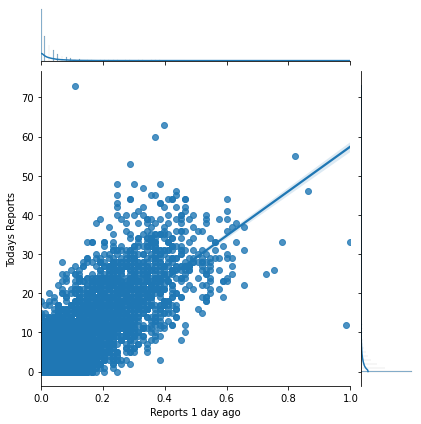

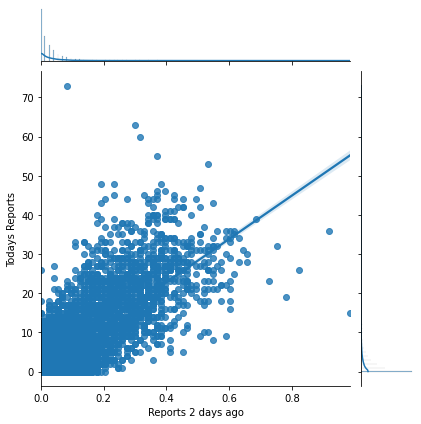

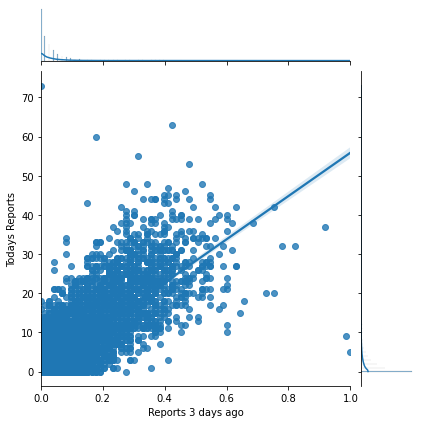

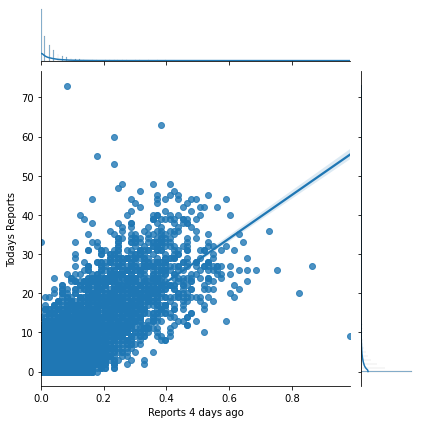

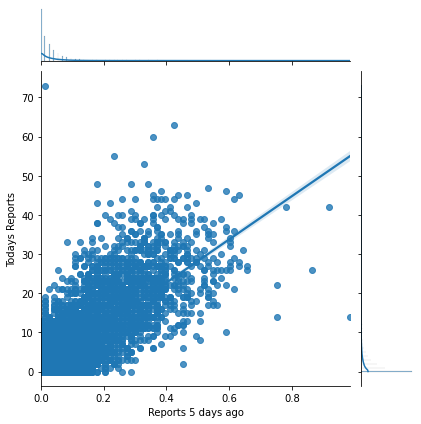

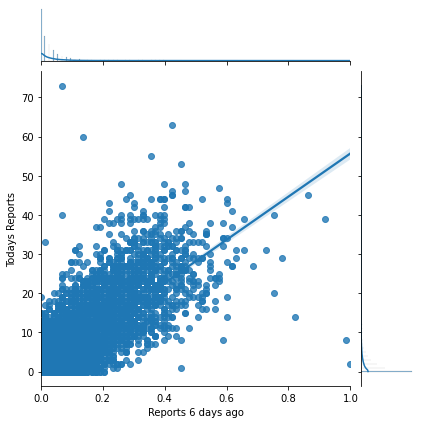

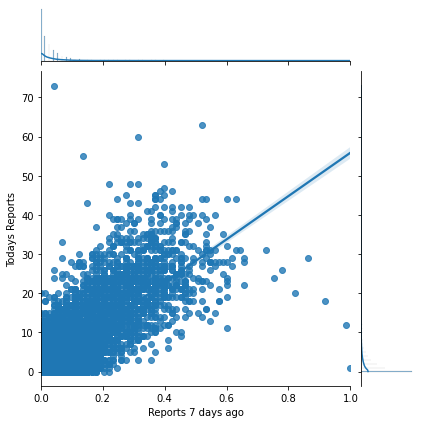

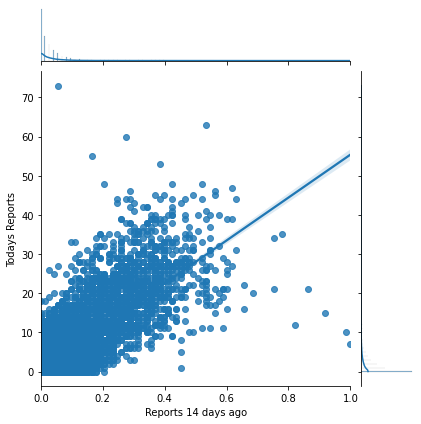

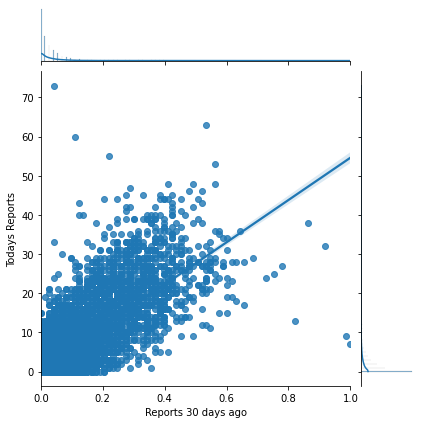

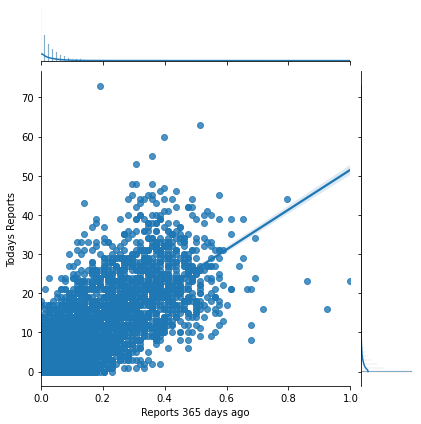

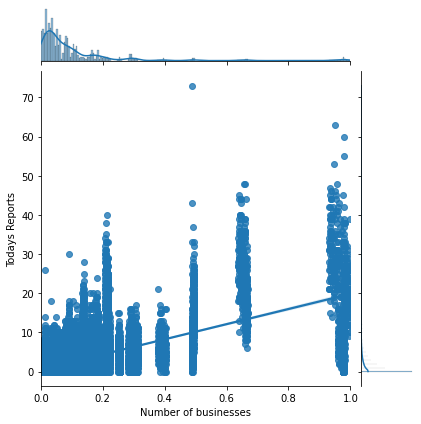

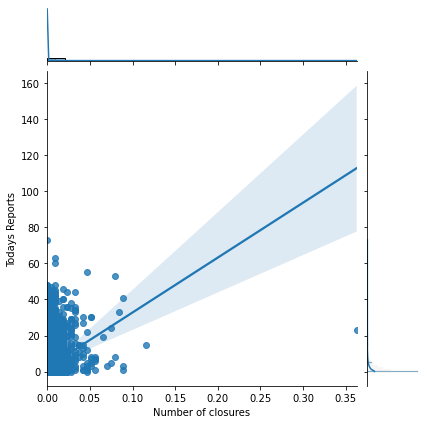

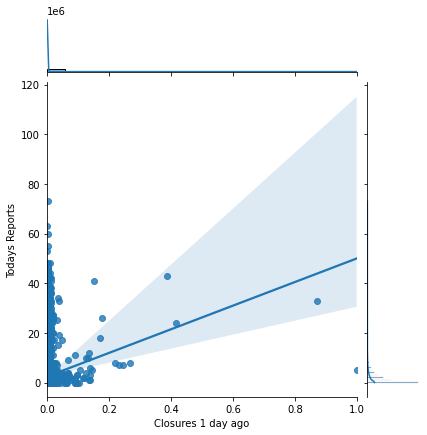

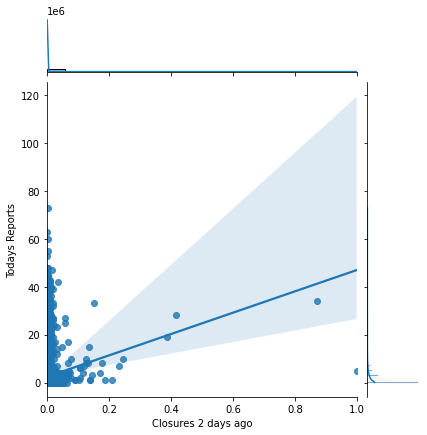

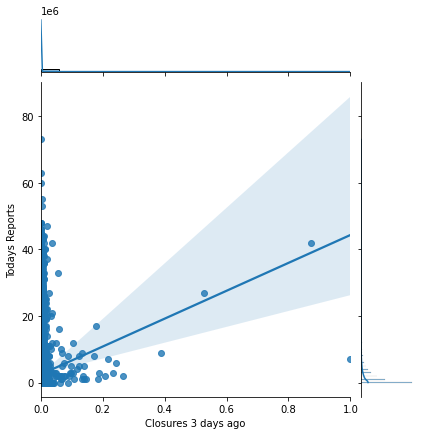

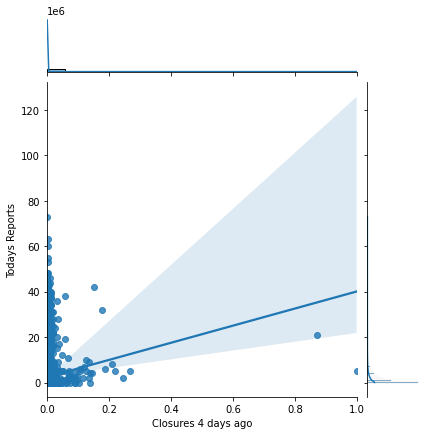

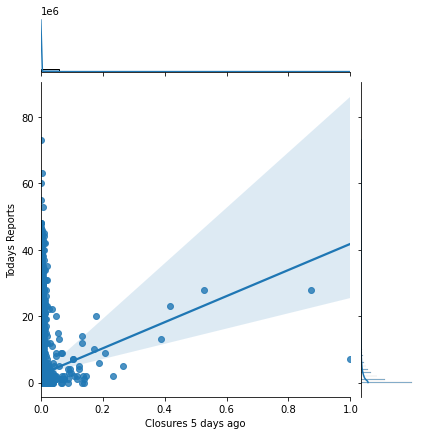

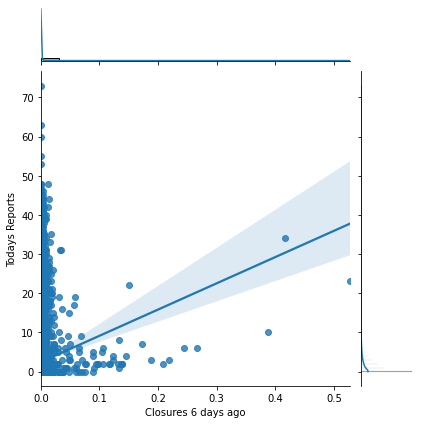

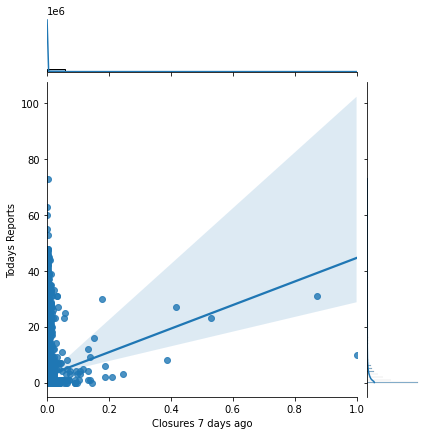

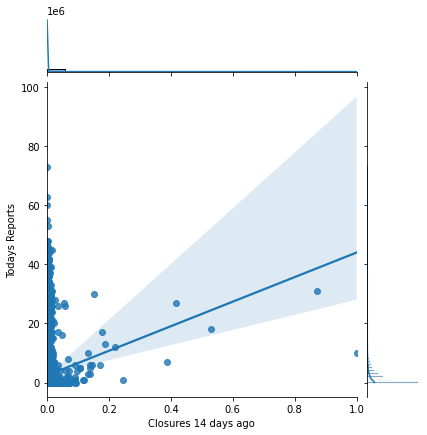

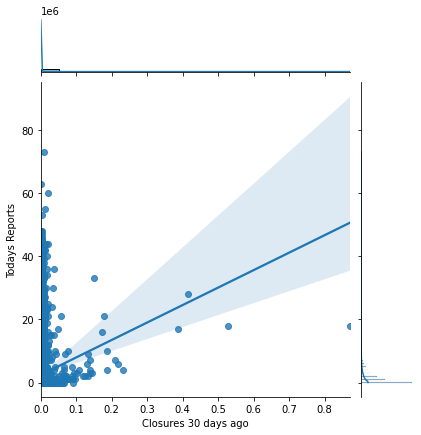

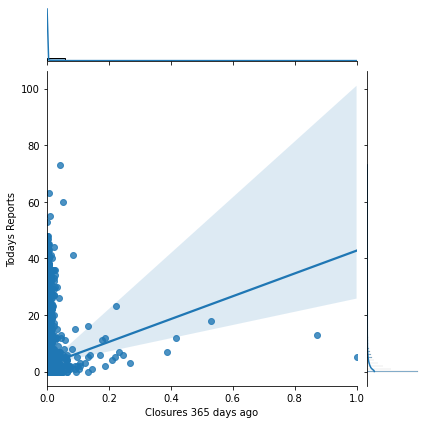

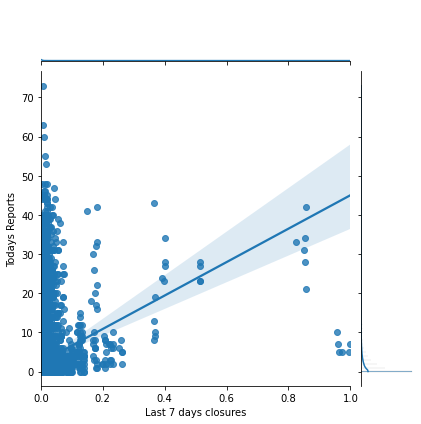

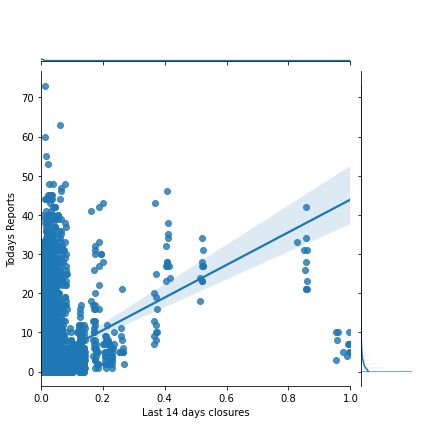

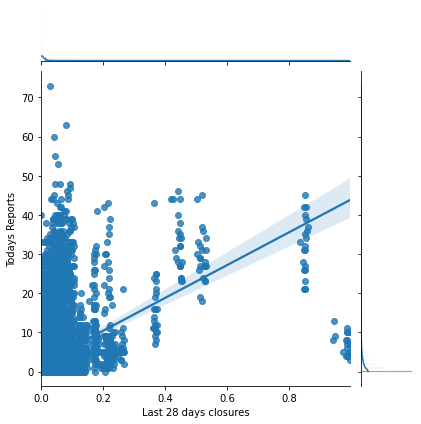

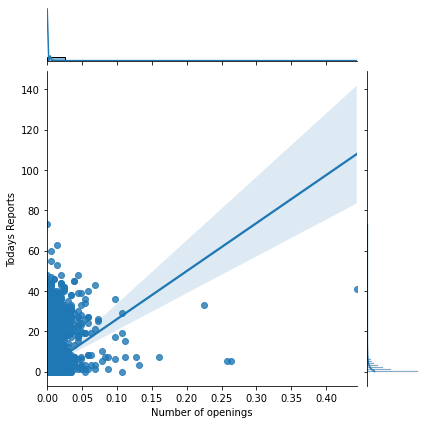

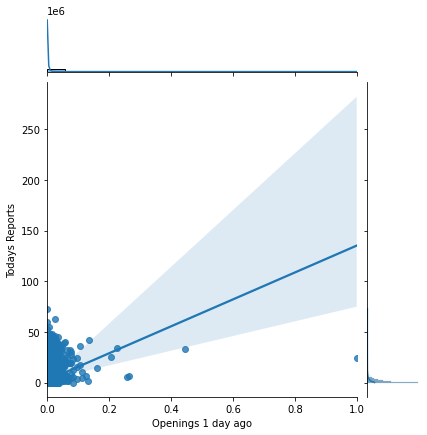

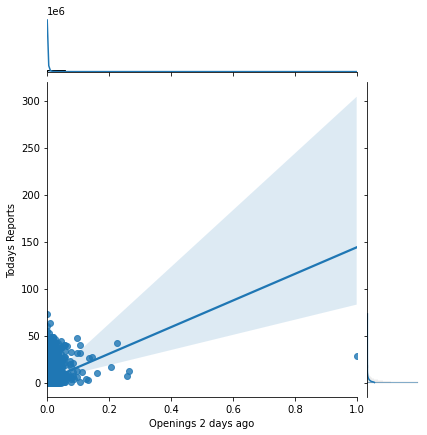

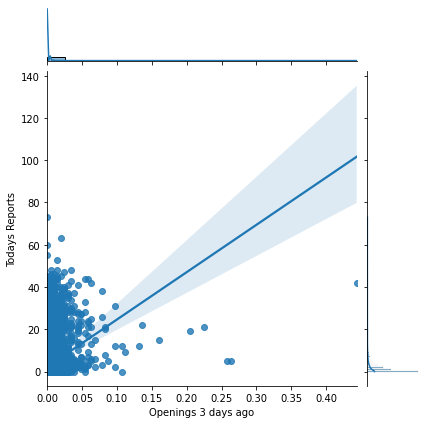

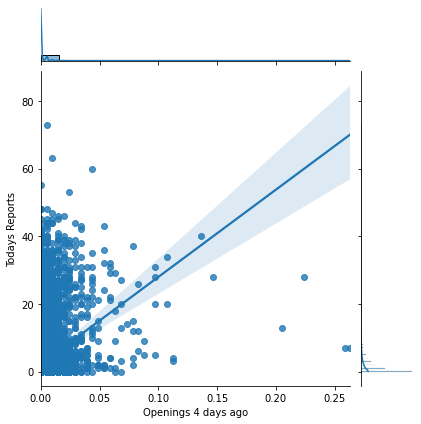

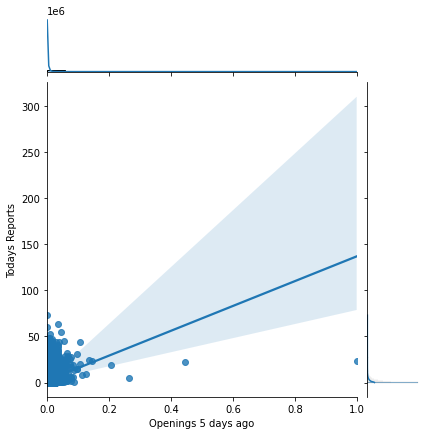

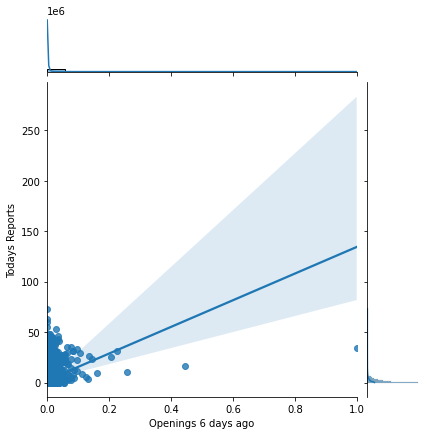

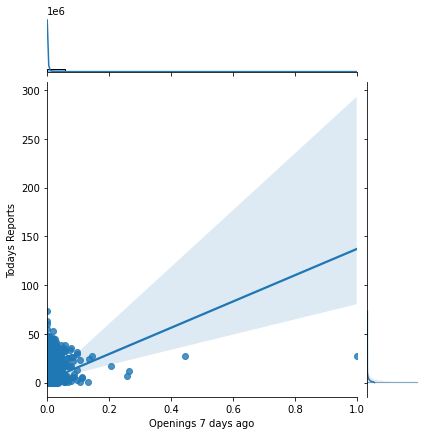

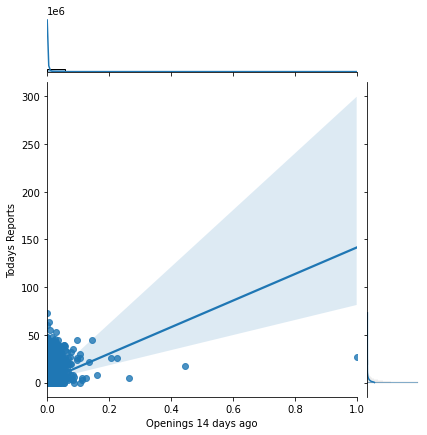

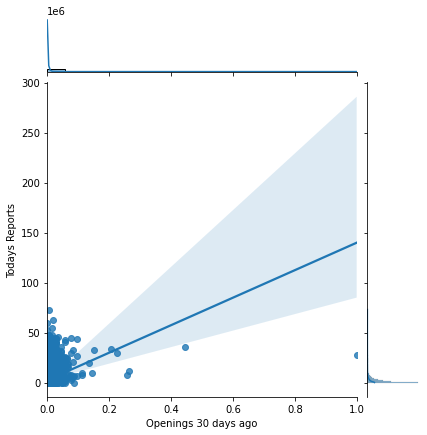

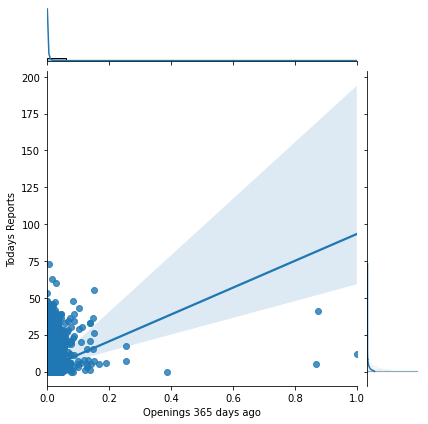

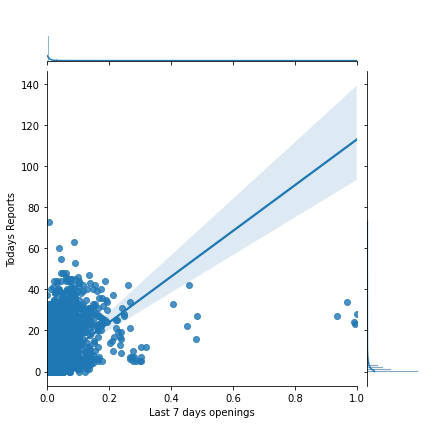

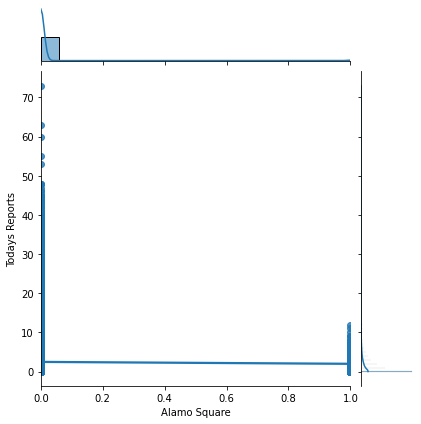

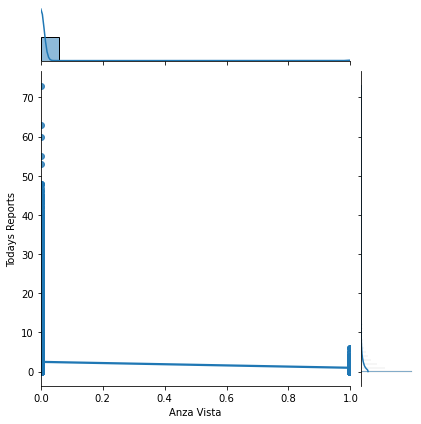

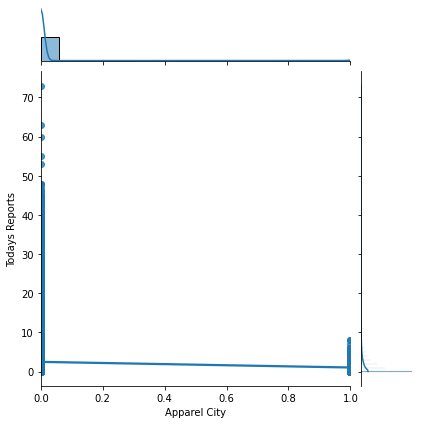

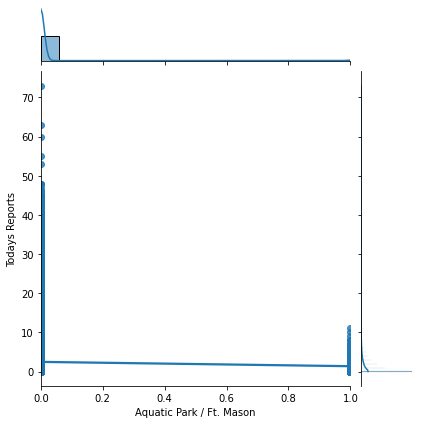

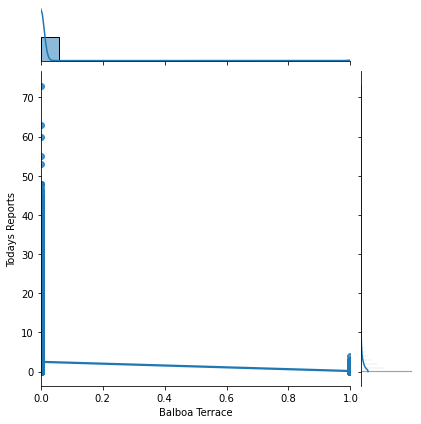

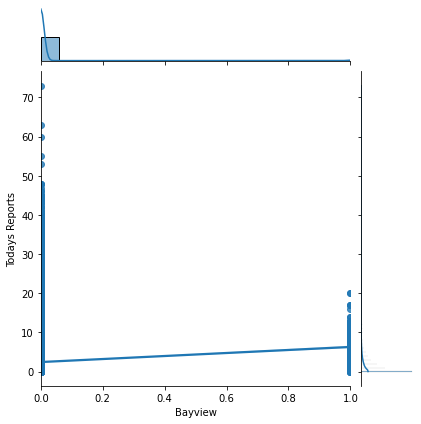

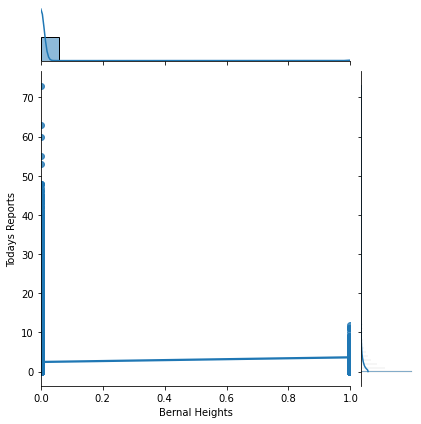

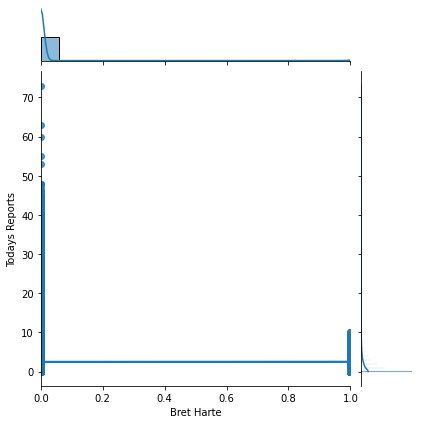

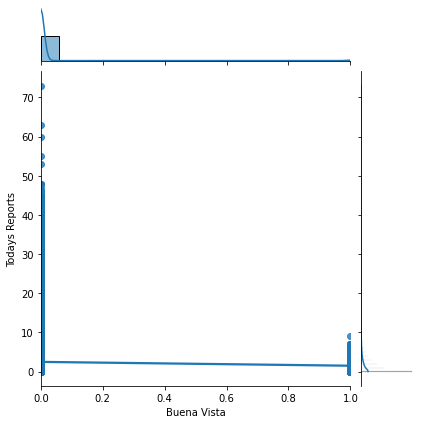

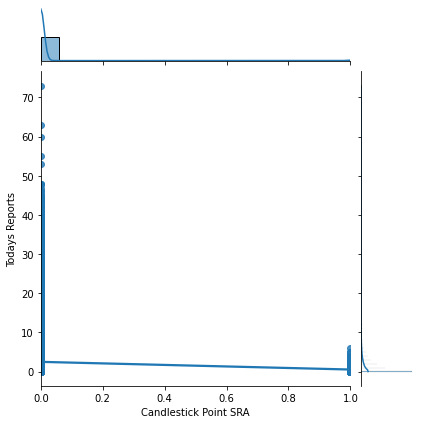

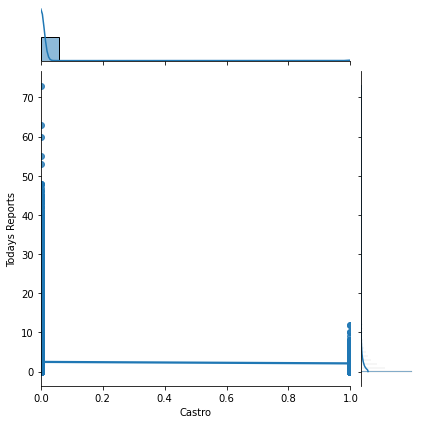

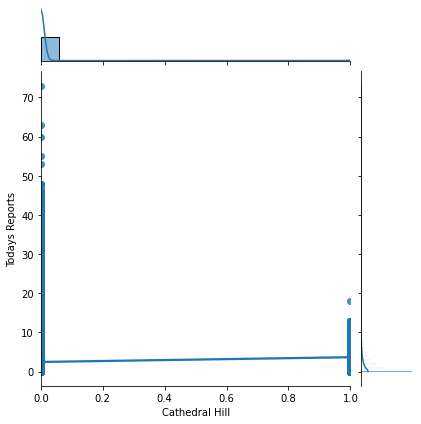

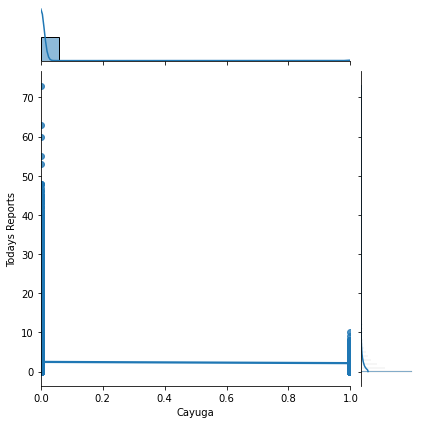

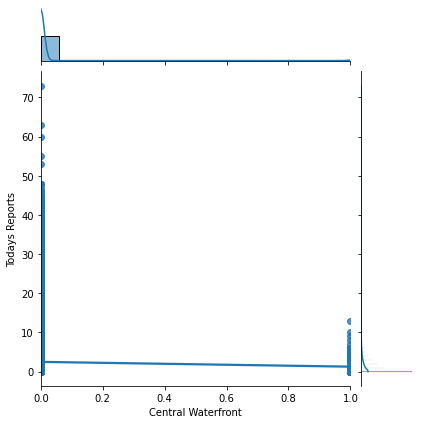

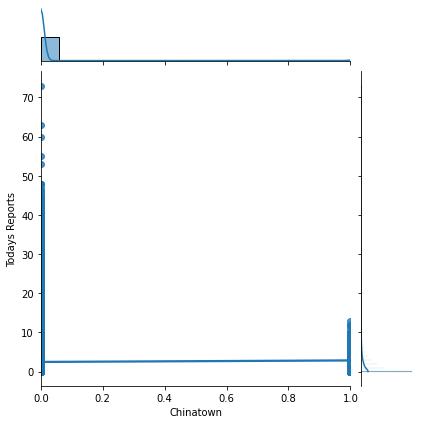

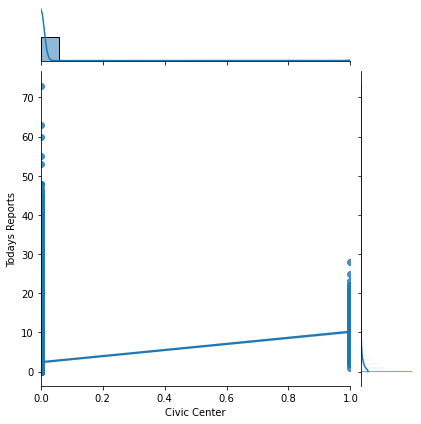

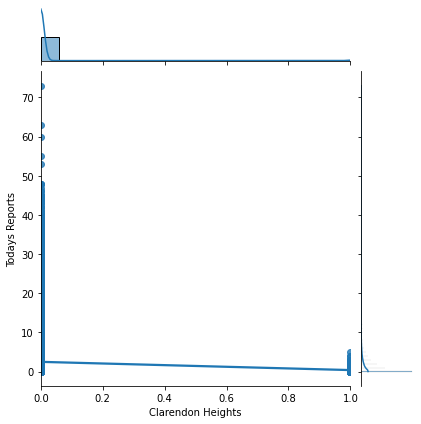

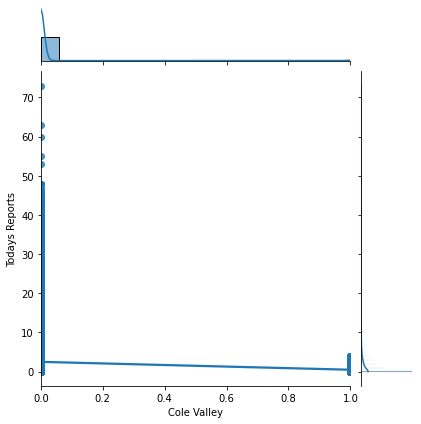

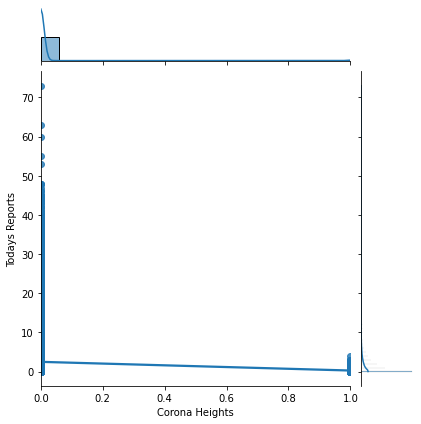

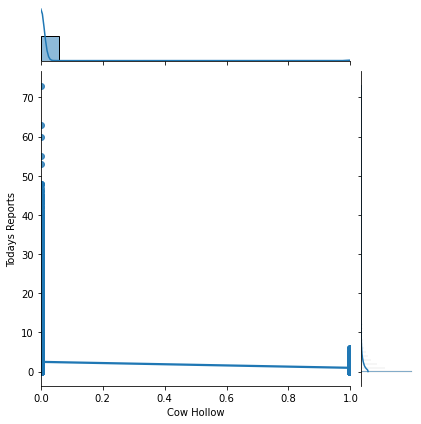

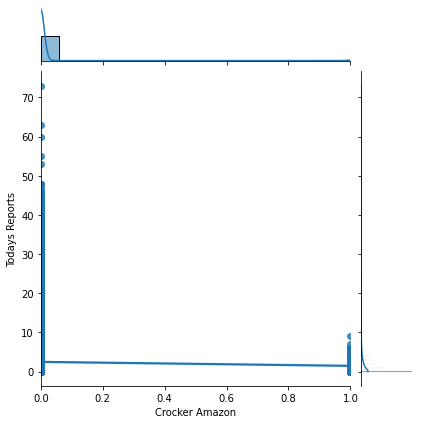

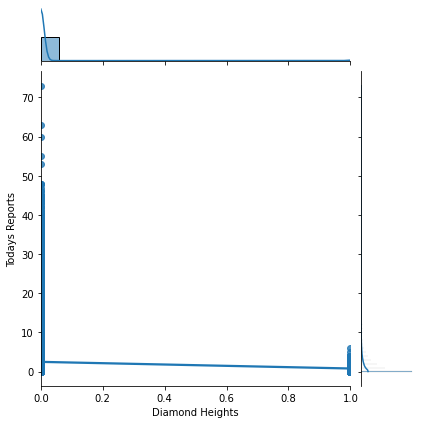

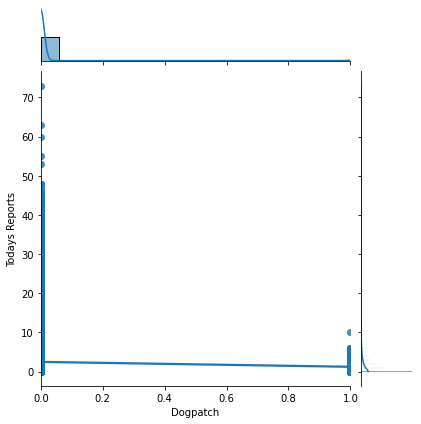

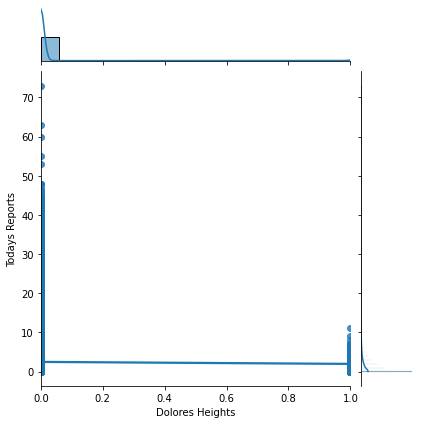

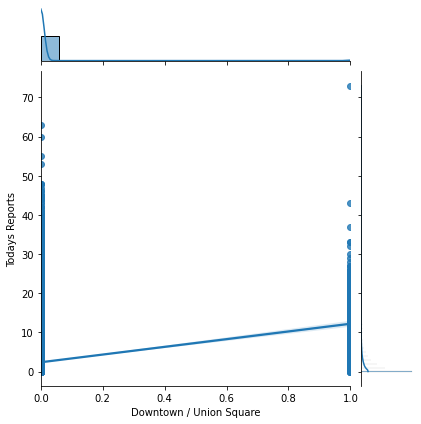

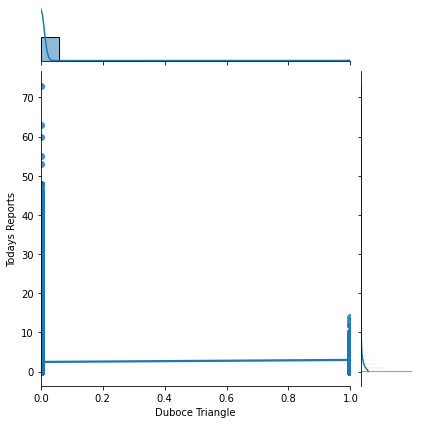

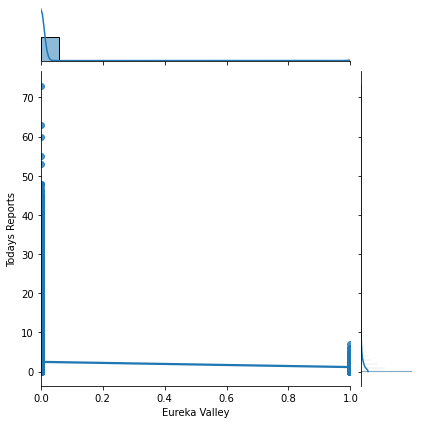

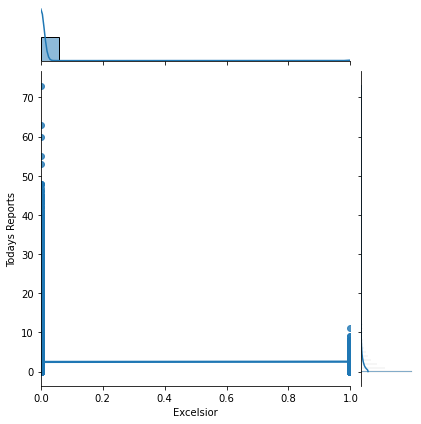

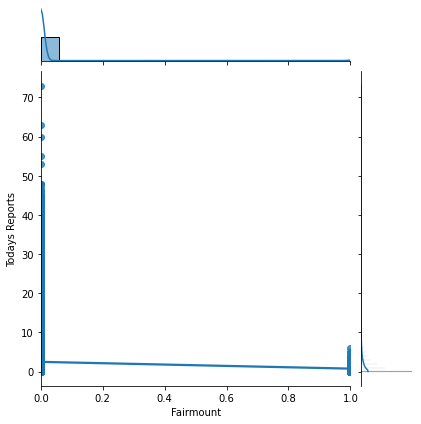

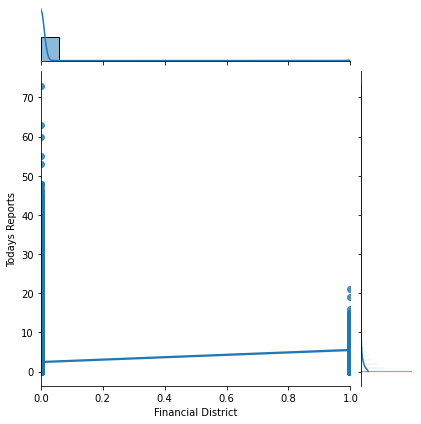

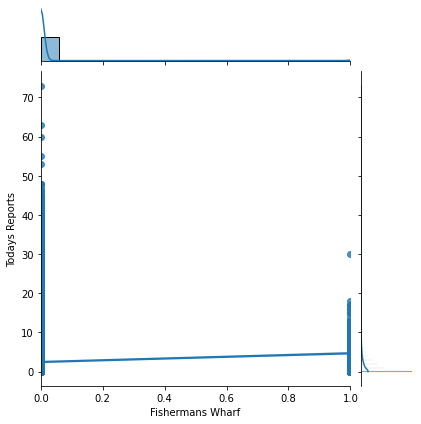

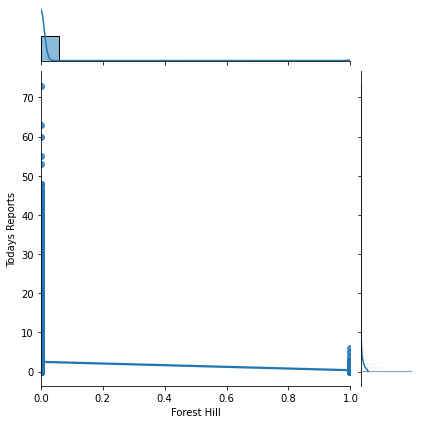

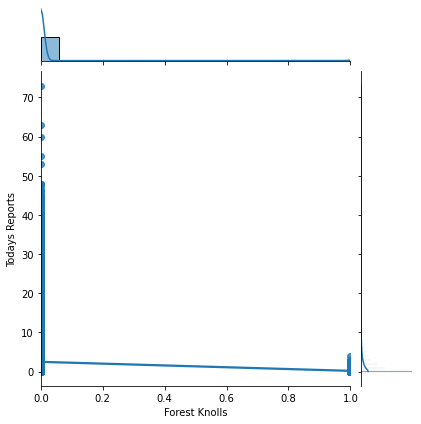

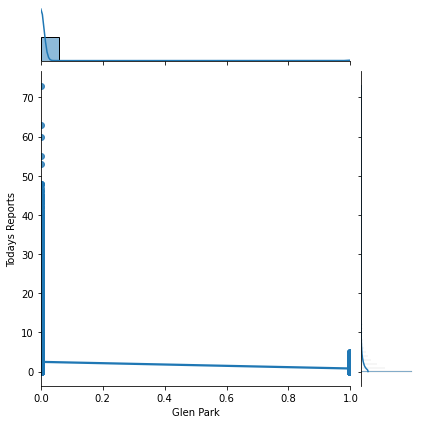

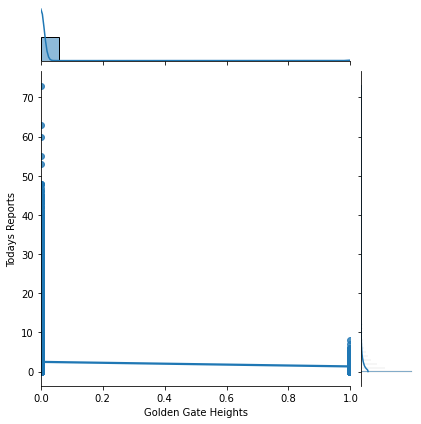

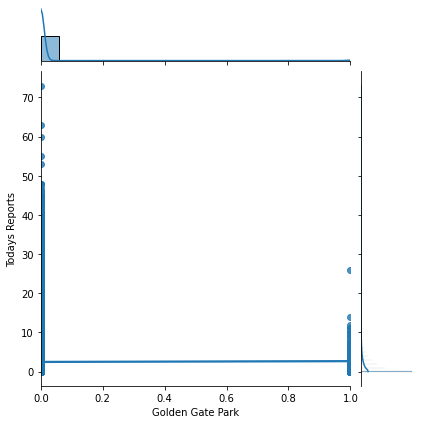

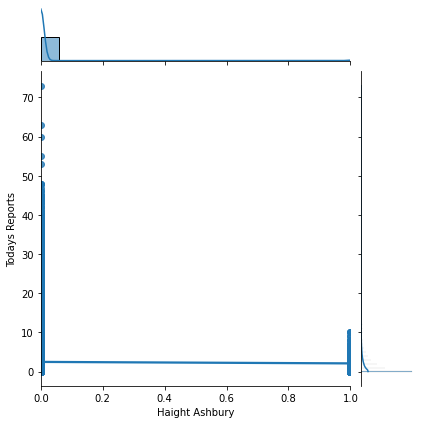

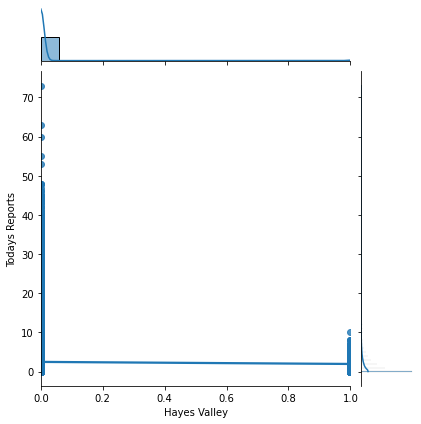

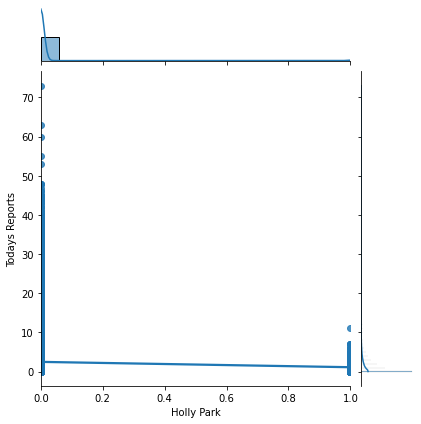

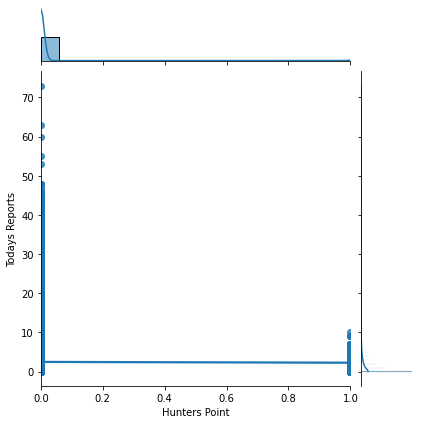

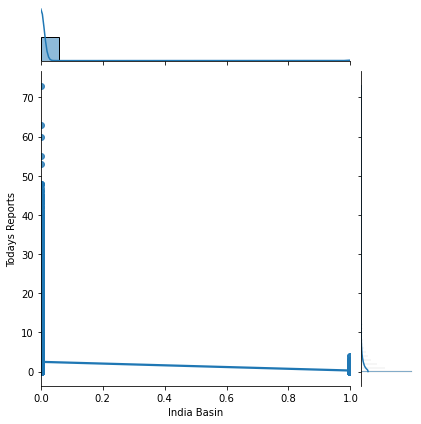

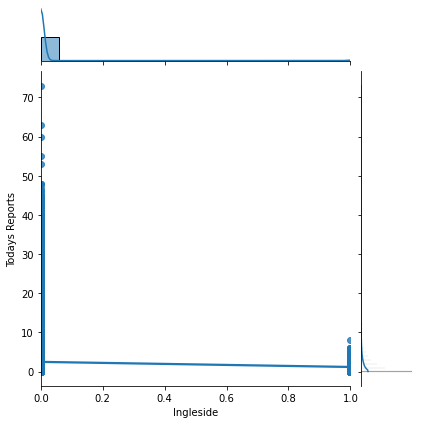

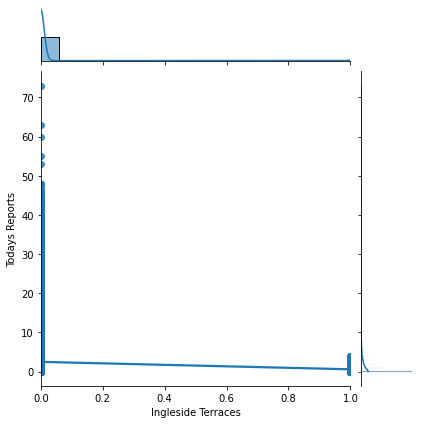

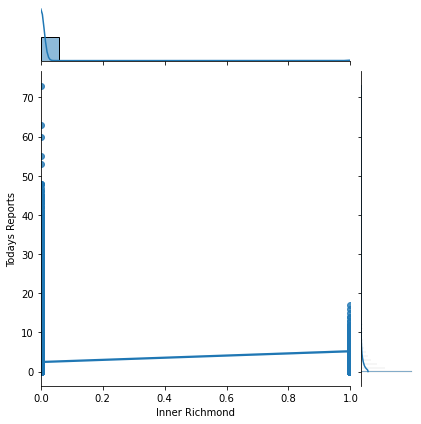

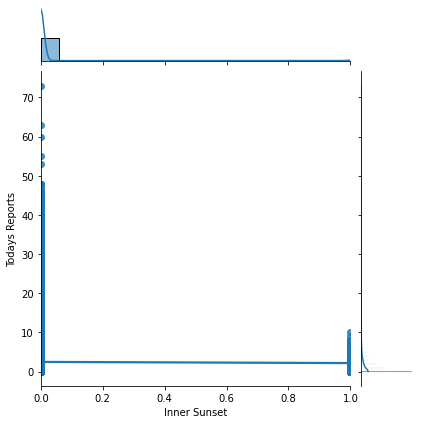

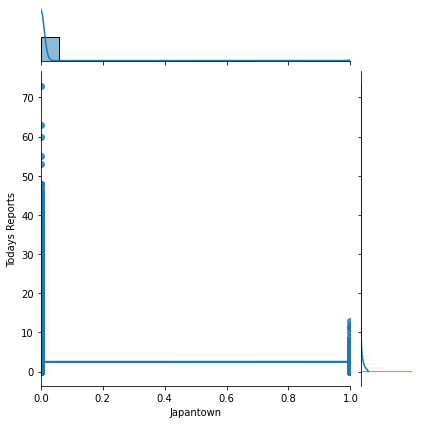

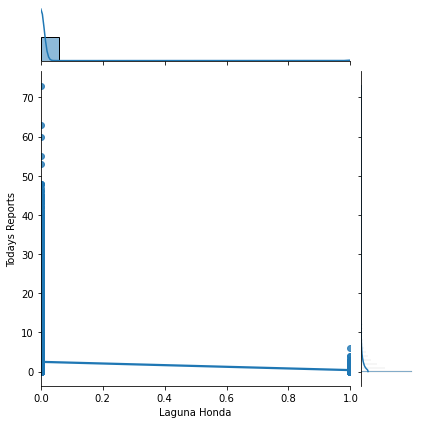

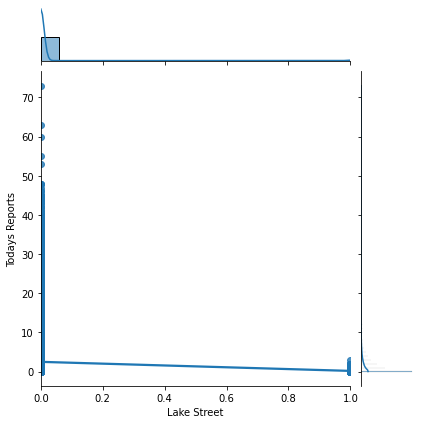

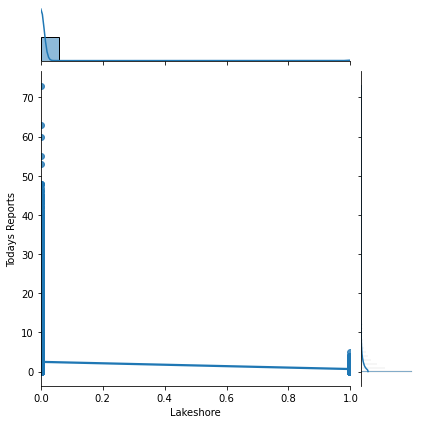

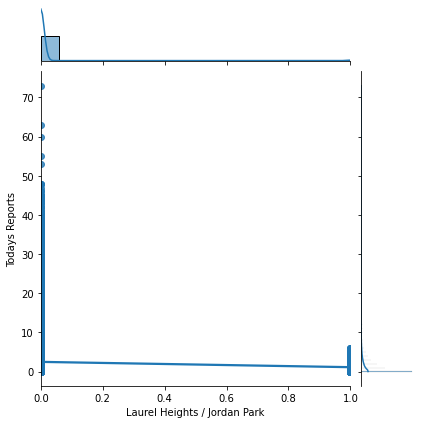

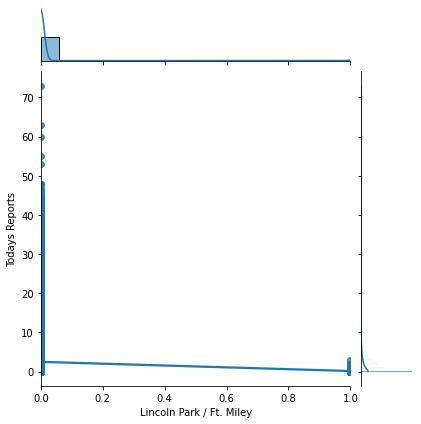

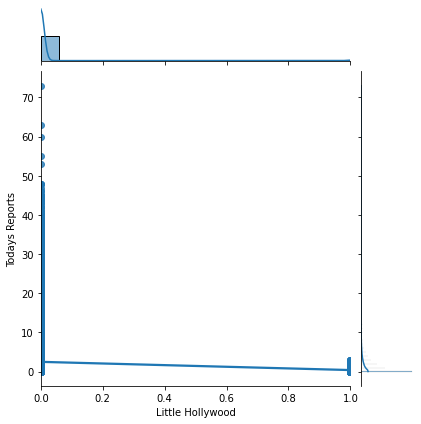

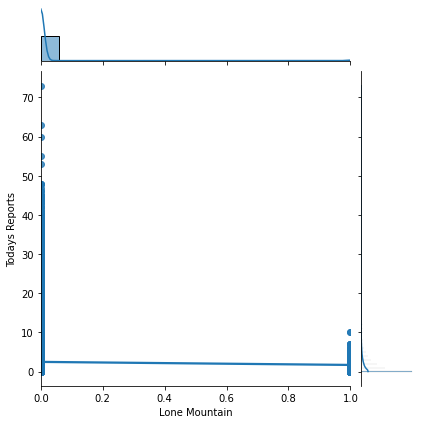

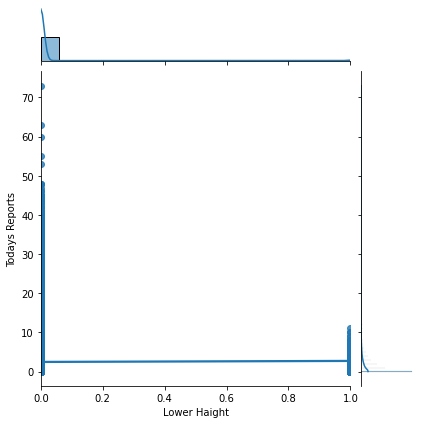

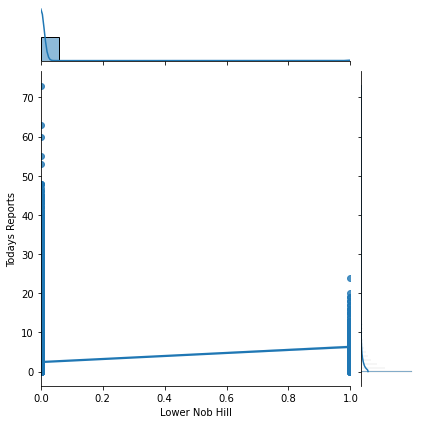

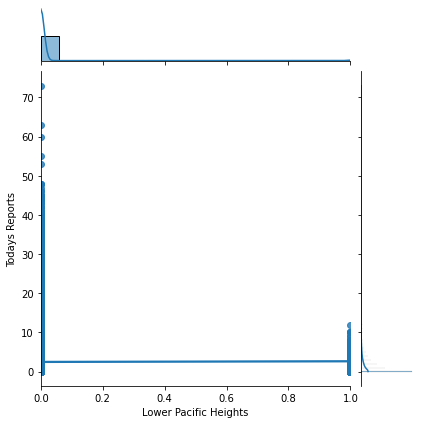

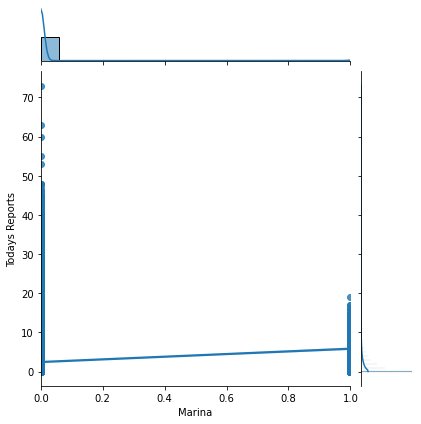

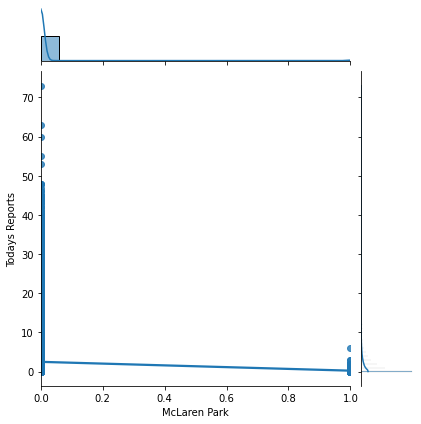

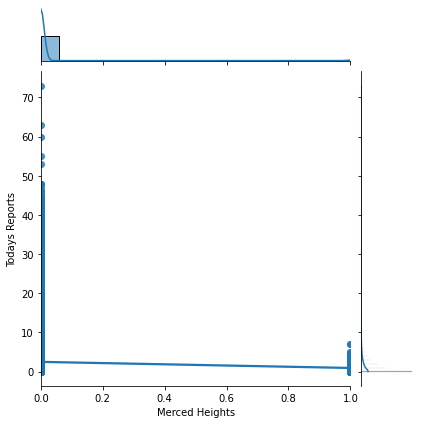

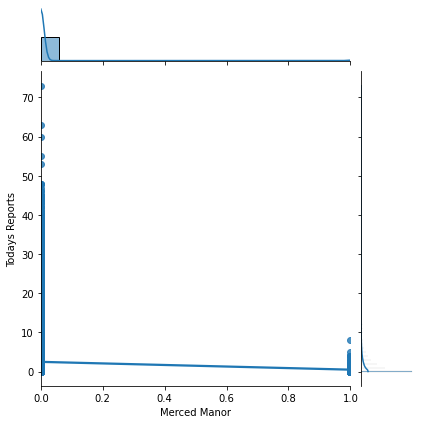

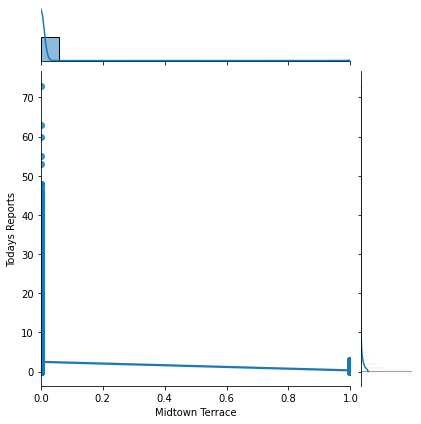

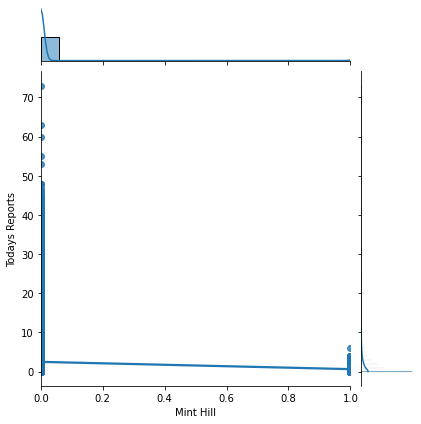

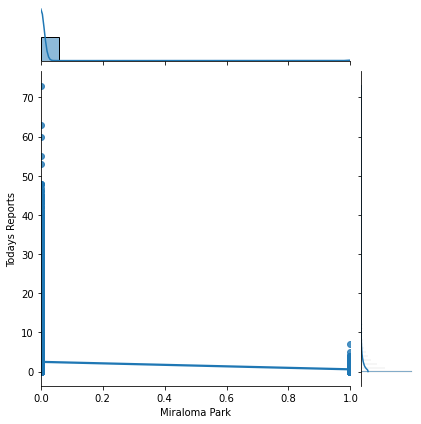

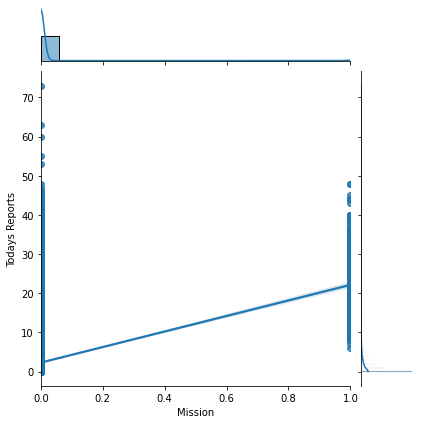

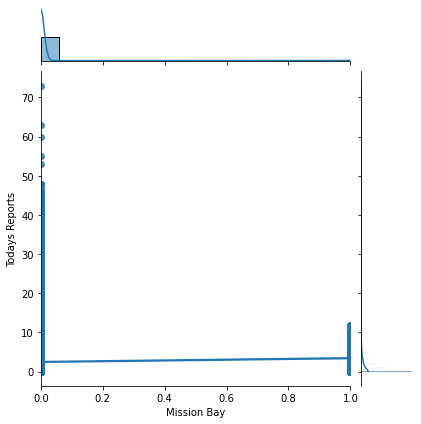

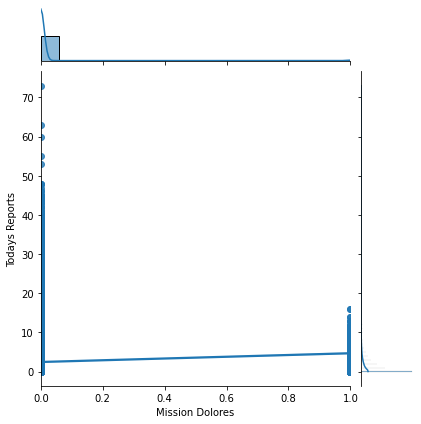

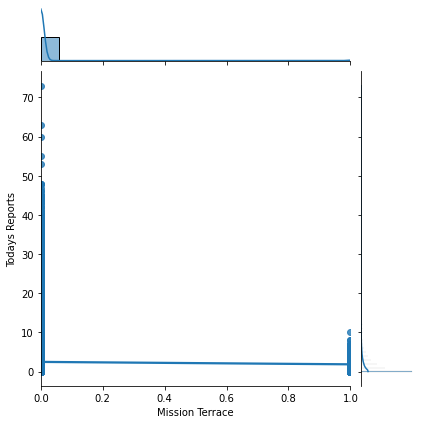

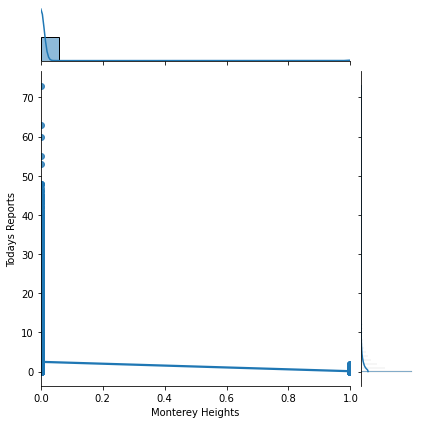

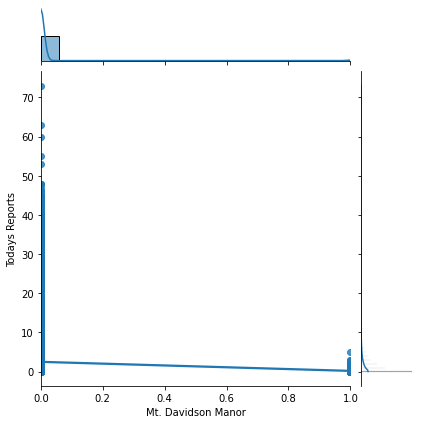

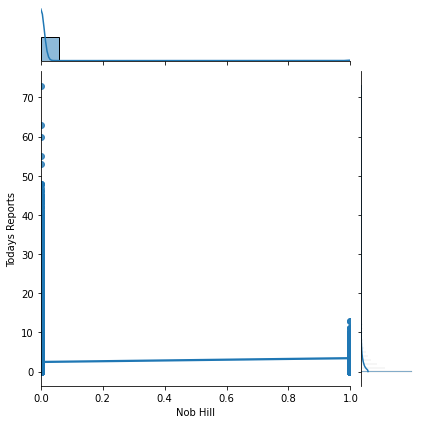

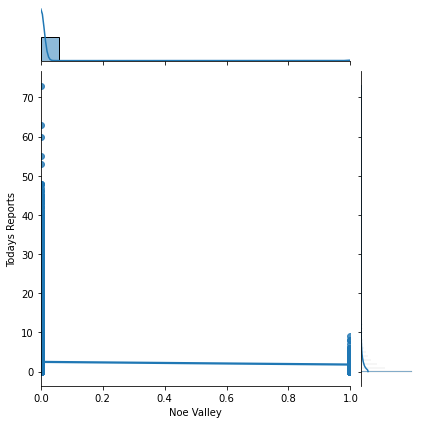

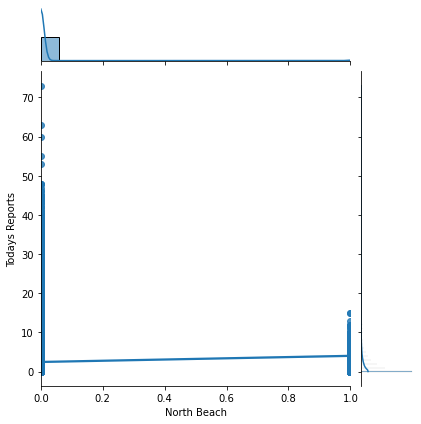

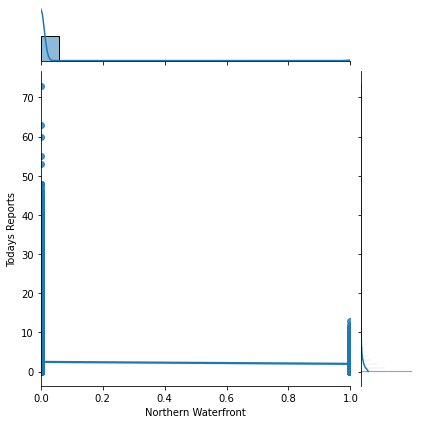

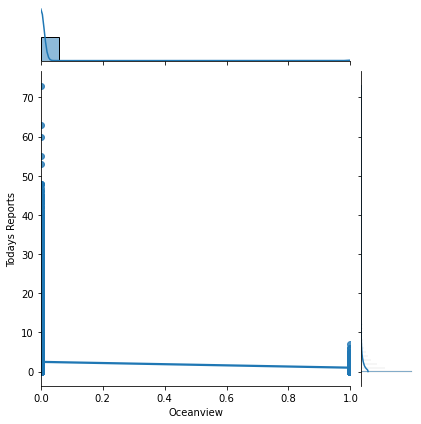

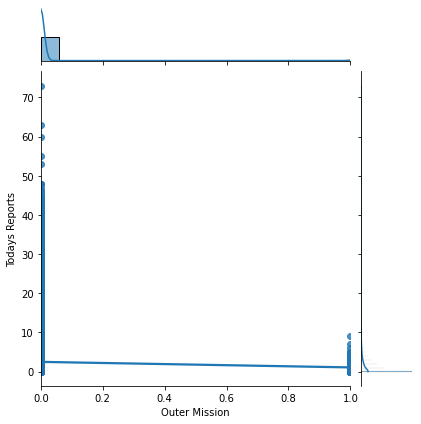

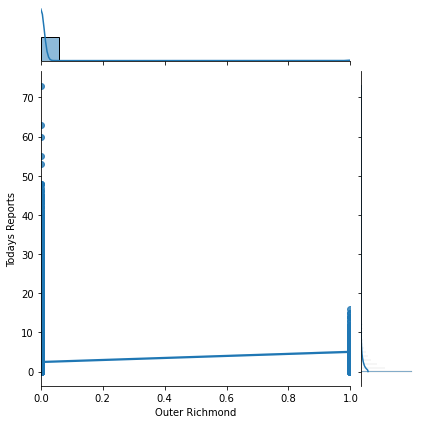

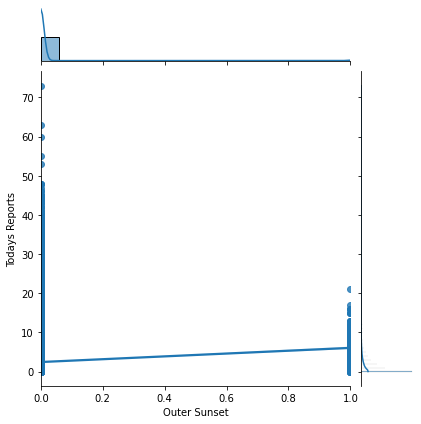

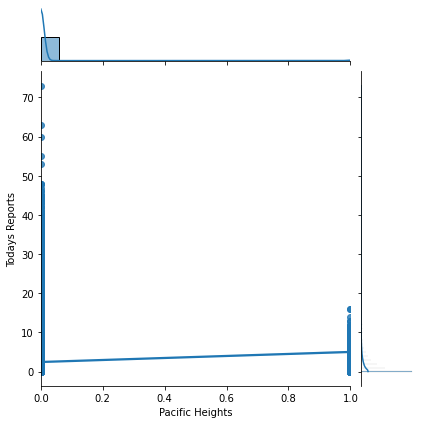

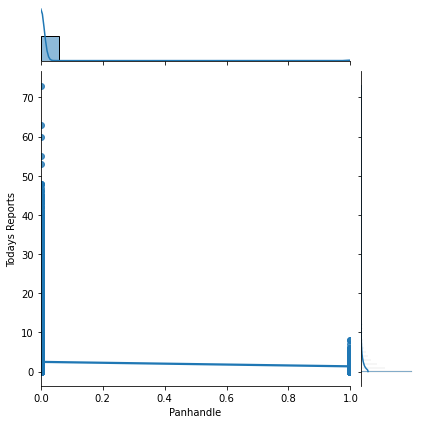

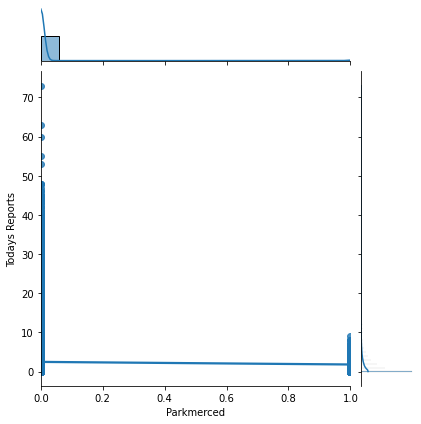

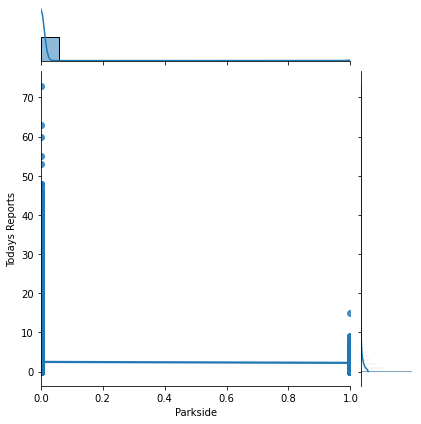

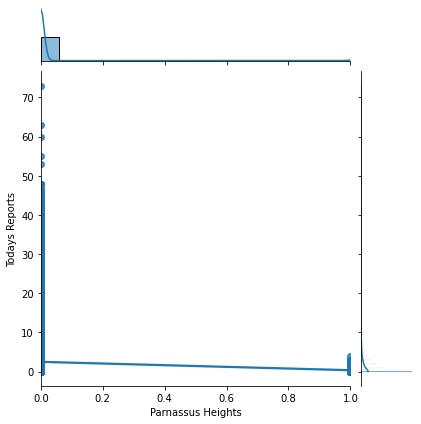

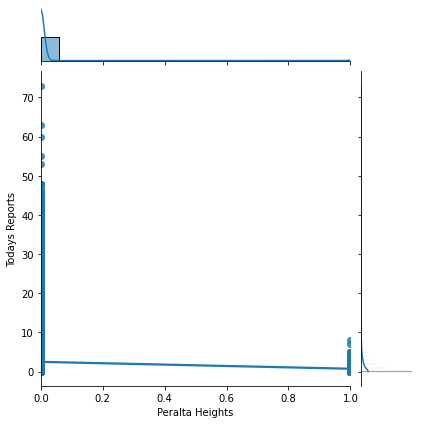

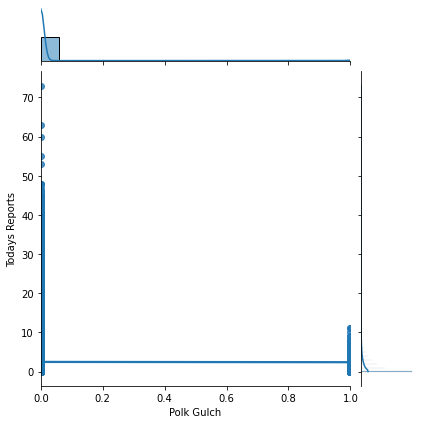

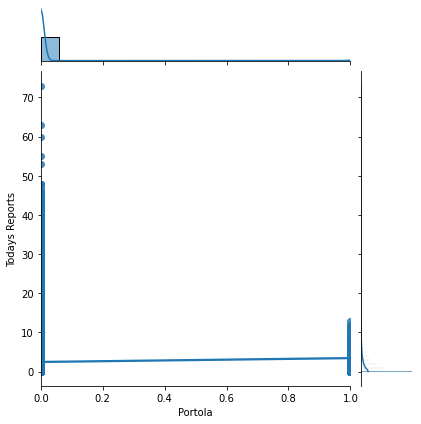

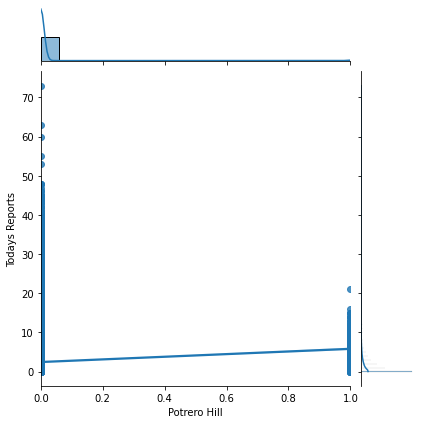

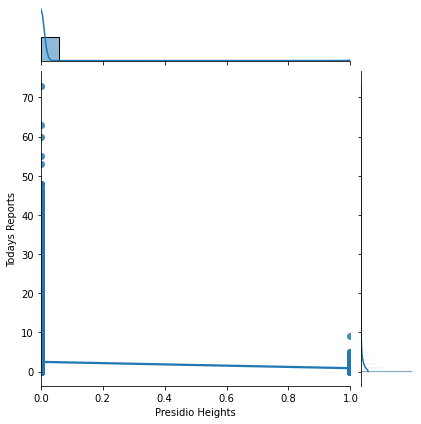

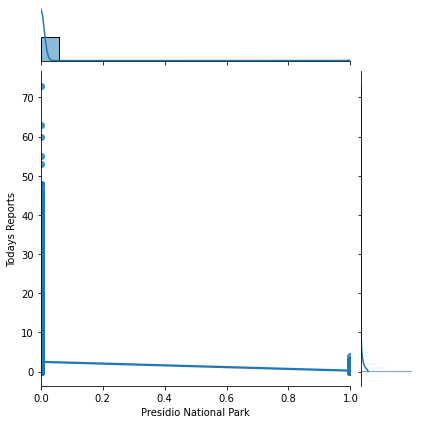

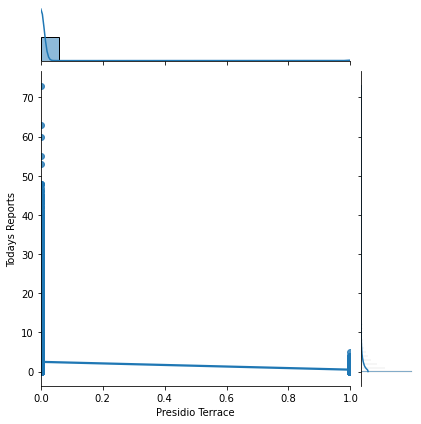

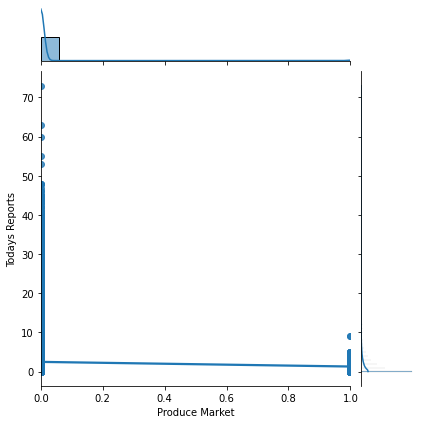

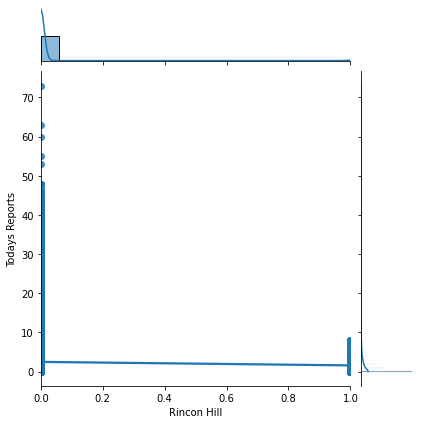

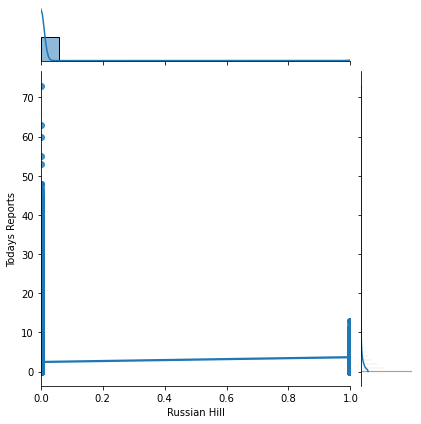

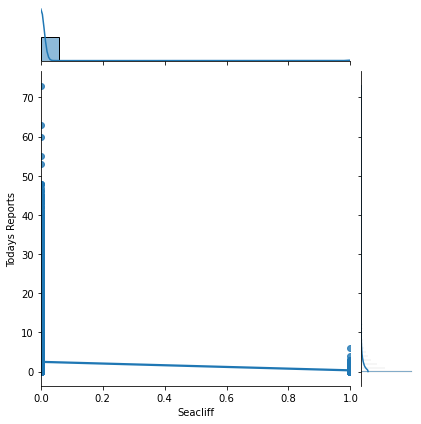

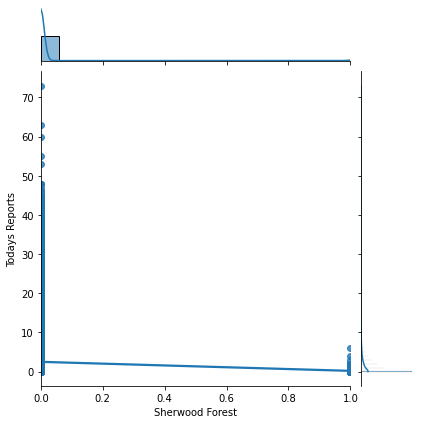

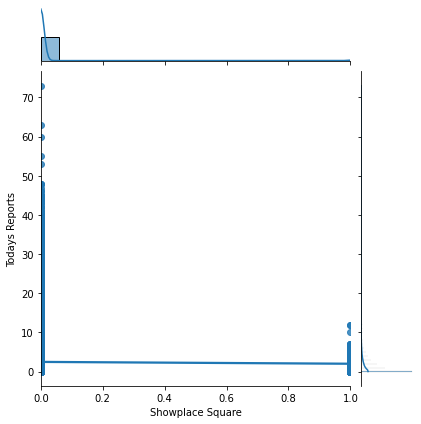

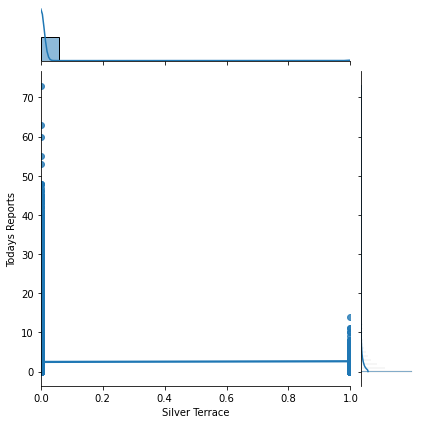

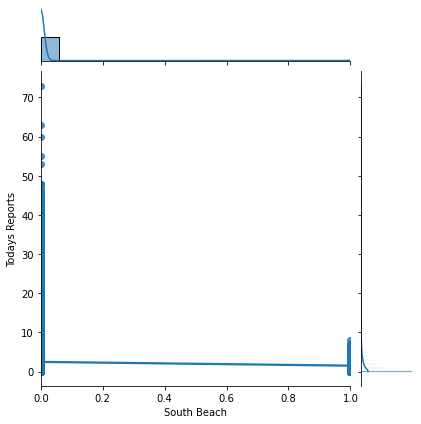

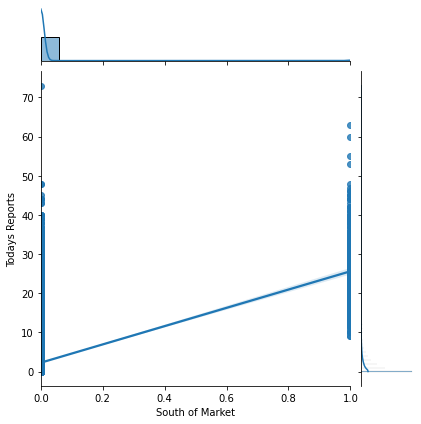

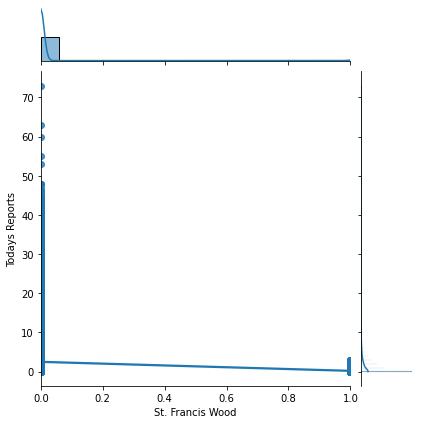

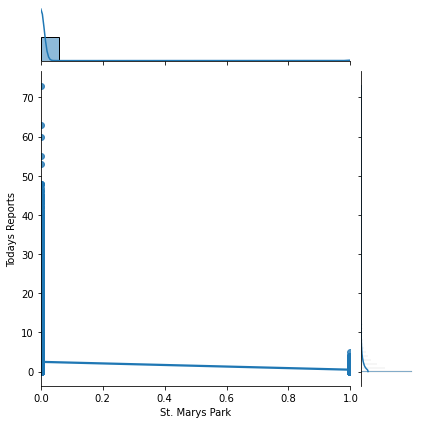

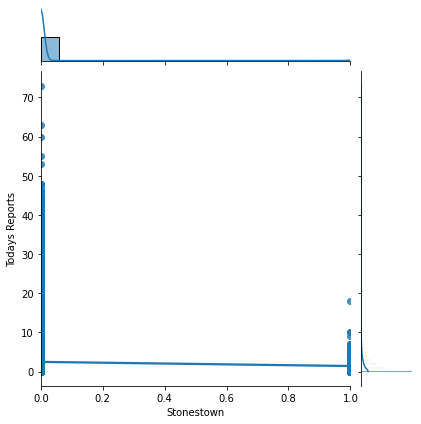

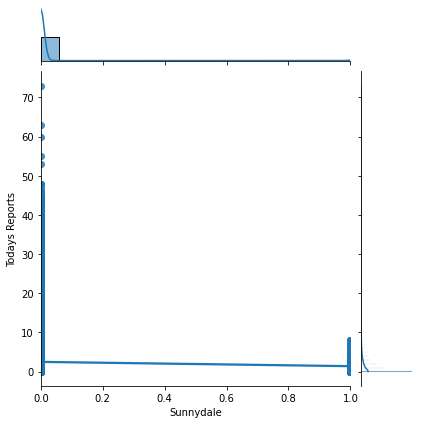

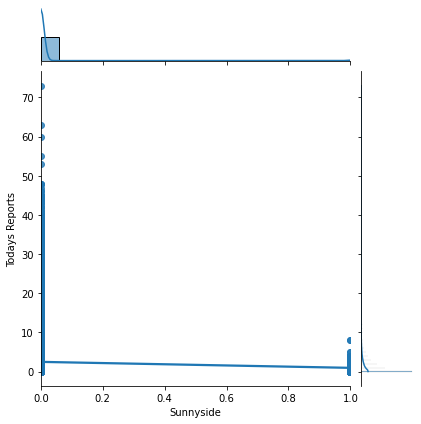

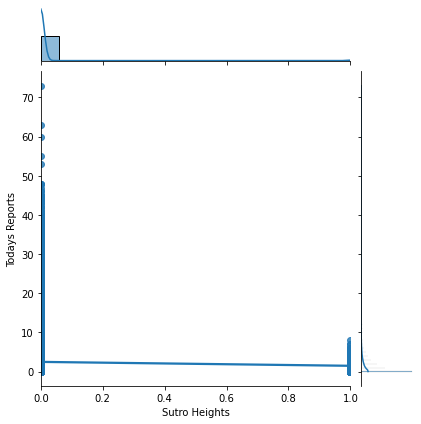

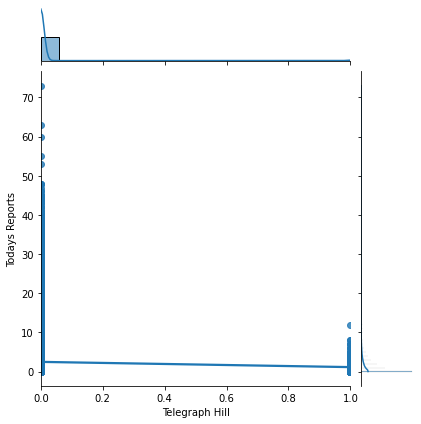

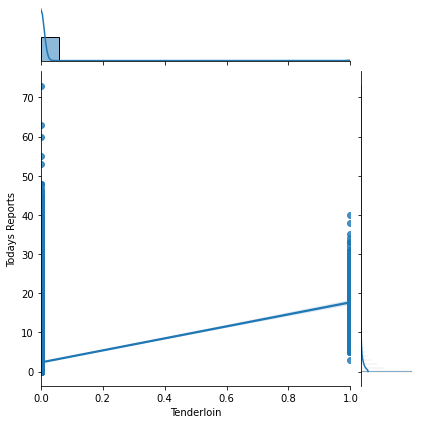

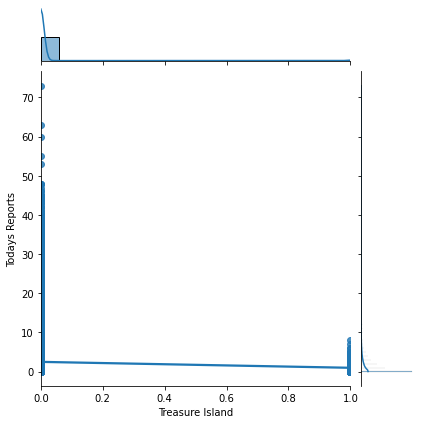

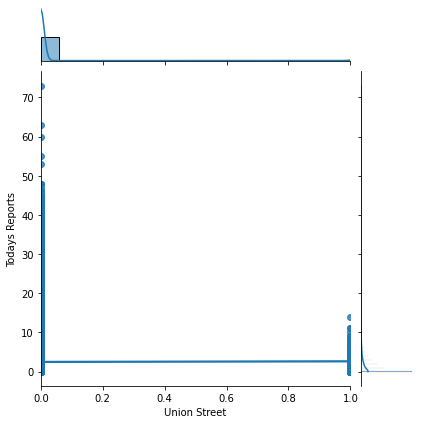

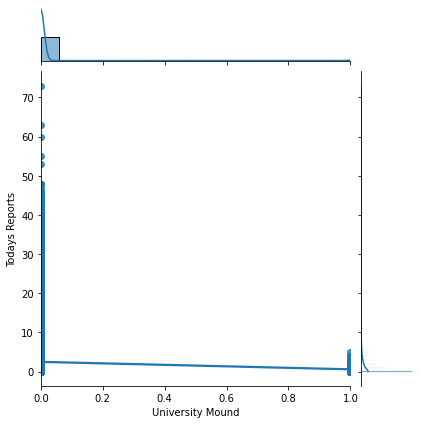

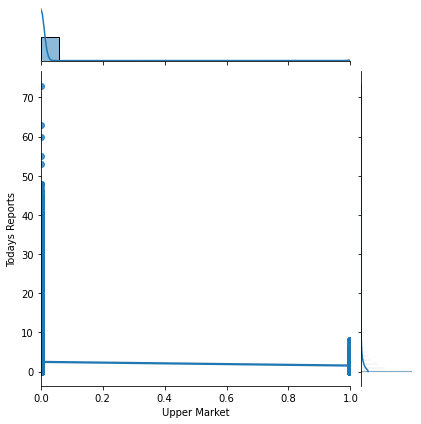

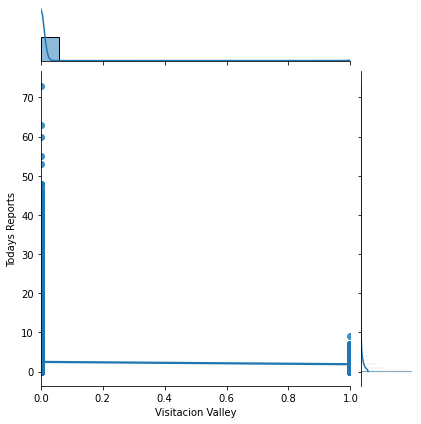

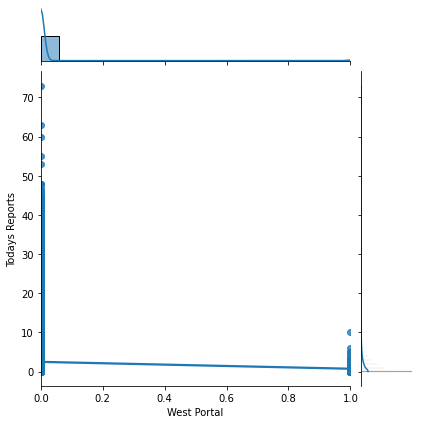

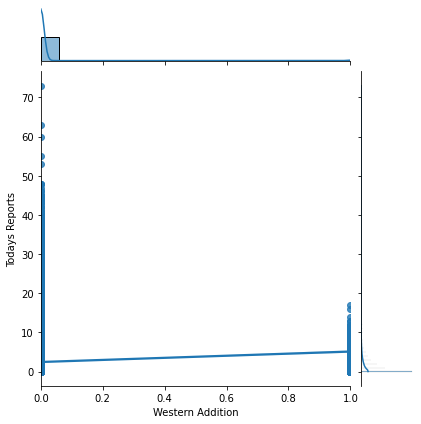

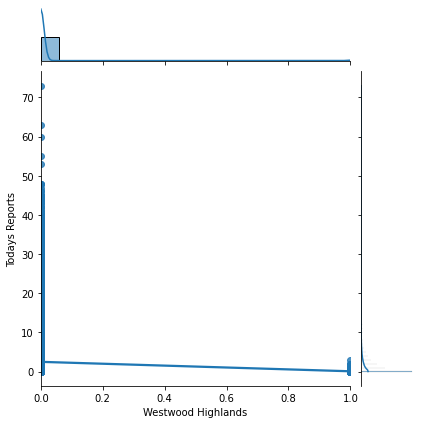

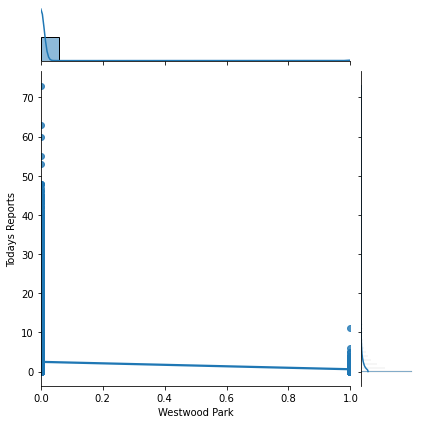

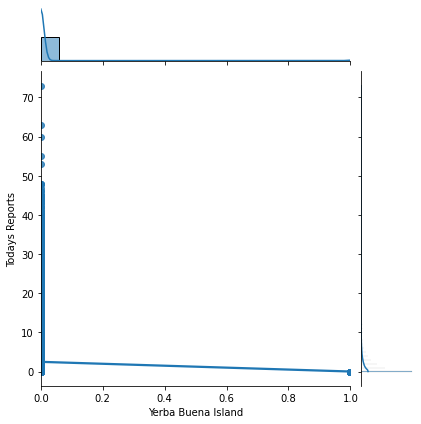

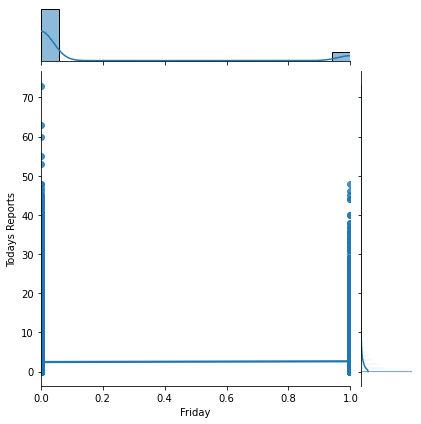

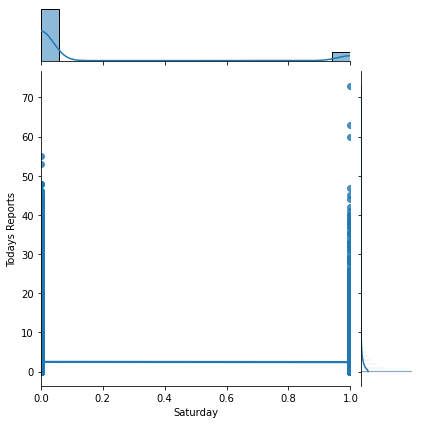

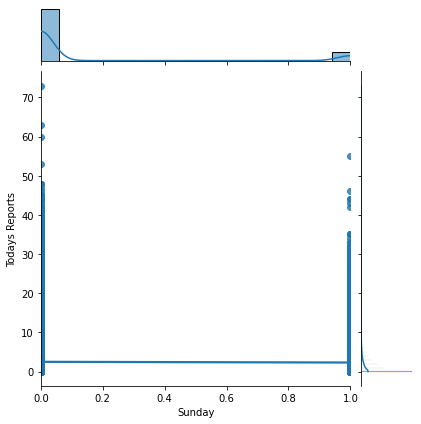

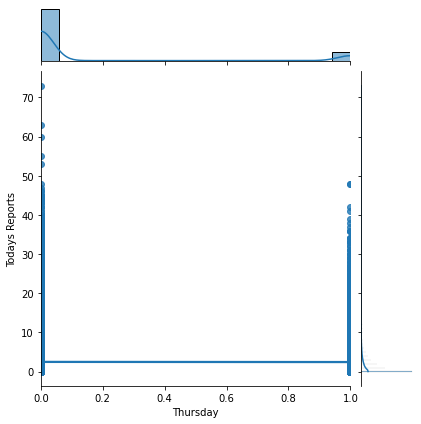

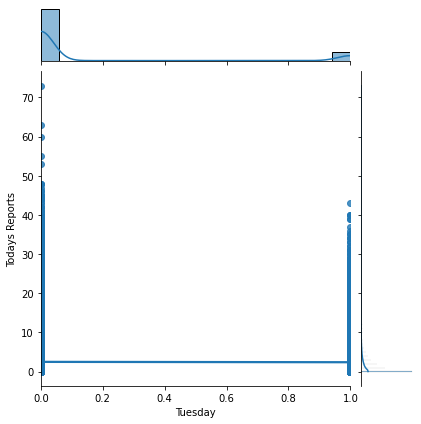

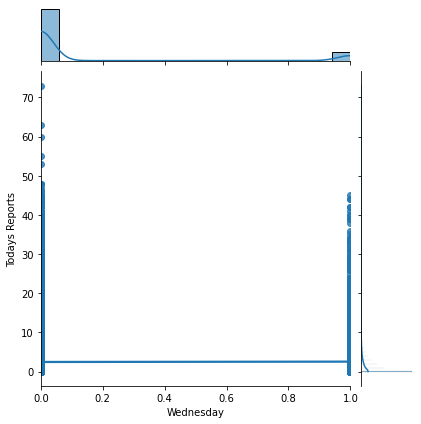

In [12]:
for col in x_train.columns:
    plot = sns.jointplot(x = col, y = "Todays Reports", data = concat_df, kind = 'reg')

In [13]:
# Results of graphs suggest some features have a strong relationship with target.
# Univariate selection should be appropriate fpr selecting features as a result

In [14]:
#correlation analysis of correlation to todays reports using pearson correlation
corr_list = []
y_train_array = y_train.astype(float).to_numpy()
y_train_array_flat = []
for sublist in y_train_array:
    for crime_rate in sublist:
        y_train_array_flat.append(crime_rate)
for col in x_train.columns:
    x_train_array = x_train[col].astype(float).to_numpy()
    corr_data = pearsonr(x_train[col].to_numpy(), y_train_array_flat)
    corr_list.append([col, corr_data[0], corr_data[1]])

In [15]:
#The lowest p-values are likely candidates for feature selection

In [16]:
corr_df = pd.DataFrame(corr_list, columns = ['Feature', 'Correlation to todays crime', 'P-Value'])
corr_df.sort_values(by = ['P-Value'], inplace = True)
print(corr_df)

                   Feature  Correlation to todays crime   P-Value
1       Reports 2 days ago                     0.768303  0.000000
24   Last 28 days closures                     0.378311  0.000000
25      Number of openings                     0.276157  0.000000
26      Openings 1 day ago                     0.213678  0.000000
27     Openings 2 days ago                     0.217538  0.000000
..                     ...                          ...       ...
120             Polk Gulch                    -0.001463  0.759306
64               Excelsior                     0.001345  0.778093
44              Bret Harte                     0.000491  0.918017
82               Japantown                     0.000281  0.953041
0        Reports 1 day ago                          NaN       NaN

[159 rows x 3 columns]
